<a href="https://colab.research.google.com/github/sahdahx/Komstat-II/blob/main/KomstatII_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas I - Komputasi Statistika II**
**Analisis Statistik Dataset Nutrition Facts Menu McDonald's**

> Nama: Sahda Huwaidah Estiningtyas

> NIM: 24/545080/PA/23156

> email: sahdahuwaidahestiningtyas@mail.ugm.ac.id

Sumber dataset: [Nutrition Facts for McDonald's Menu](https://www.kaggle.com/datasets/mcdonalds/nutrition-facts?resource=download)

Link tugas: [sahdahx/Komstat-II](https://github.com/sahdahx/Komstat-II/blob/main/KomstatII_T1.ipynb)

# 1. Problem Identification

Dataset ini berisi informasi kandungan nutrisi dari setiap menu yang tersedia di McDonald's Amerika Serikat. Sebagai perusahaan fast food global, McDonald's perlu memastikan transparansi informasi nutrisi untuk:
- Memberikan informasi yang jelas kepada konsumen
- Mendukung kampanye pola makan sehat
- Mengevaluasi komposisi nutrisi tiap kategori menu

Dalam tugas ini, fokus analisis adalah pada tiga variabel utama:
- Serving Size
- Calories
- Total Fat

Karena ketiga variabel tersebut mewakili **ukuran porsi**, **energi yang dikonsumsi**, dan **kandungan lemak utama dalam menu**.

Tujuan analisis:
1. Menghitung statistik deskriptif (mean, median, modus, range, kuartil, IQR, standar deviasi, varians)
2. Mengidentifikasi data outlier menggunakan metode IQR
3. Menganalisis distribusi data berdasarkan kategori menu tertentu
4. Mengidentifikasi 5 menu dengan nilai tertinggi pada setiap kategori

Kategori yang dianalisis:
- Coffee & Tea
- Breakfast
- Chicken & Fish
- Beef & Pork
- Snacks & Sides

# 2. Data Understanding

## 2.1 Dataset Overview

Dataset ini merupakan hasil scraping dari website resmi McDonald's dan berisi informasi nutrisi lengkap untuk setiap item menu.

Dataset terdiri dari:
- 260 baris (menu items)
- 24 kolom (nutritional features)

Berdasarkan hasil eksplorasi data:
- Seluruh kolom memiliki 260 non-null values
- Tidak terdapat missing values
- Tidak terdapat data duplikat

Dengan demikian, dataset berada dalam kondisi lengkap dan siap dianalisis.

## 2.2 Data Structure

Dataset terdiri dari **260 baris dan 24 kolom** dengan rincian tipe data:
- 3 kolom bertipe `object`
  - Category
  - Item
  - Serving Size
- 18 kolom bertipe `int64`
- 3 kolom bertipe `float64`
  - Total Fat
  - Saturated Fat
  - Trans Fat

Variabel yang menjadi fokus analisis dalam tugas ini adalah:
- Serving Size (`object` → perlu diproses menjadi numerik)
- Calories (`int64`)
- Total Fat (`float64`)

Karena Serving Size masih dalam bentuk string (misalnya: 4.8 oz (136 g)), maka diperlukan proses ekstraksi agar dapat digunakan dalam analisis statistik.

In [15]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load Dataset
df = pd.read_csv('menu.csv')
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [4]:
# Melihat nama kolom
print("\nDaftar Kolom:")
print(df.columns)


Daftar Kolom:
Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [5]:
# Informasi tipe data
print("\nInfo Dataset:")
df.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 

In [6]:
# Statistik deskriptif awal
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [10]:
# Mengecek missing values
missing = df.isnull().sum()
missing

,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


In [14]:
# Mengecek data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


# 3. Data Preparation & Statistical Analysis

## 3.1 Data Cleaning & Feature Engineering

Kolom Serving Size awalnya berbentuk string (`object`) dengan dua satuan (oz dan gram), contohnya: `4.8 oz (136 g)`

Supaya dapat dianalisis secara statistik, dilakukan **Feature Engineering** untuk:
- Ekstraksi nilai gram
- Konversi menjadi tipe numerik
- Pengecekan nilai negatif
- Validasi tipe data

Kemudian dibuat kolom baru: **Serving Size (g)**

## 3.2 Statistik Deskriptif

Perhitungan statistik deskriptif dan analisis lanjutan dilakukan terhadap variabel berikut:
- Serving Size (g)
- Calories
- Total Fat

Ukuran pemusatan data:
- Mean
- Median
- Modus

Ukuran penyebaran data:
- Range
- Q1
- Q3
- IQR
- Standard Deviation
- Variance

Tujuan analisis ini adalah untuk memahami karakteristik distribusi masing-masing variabel, baik dari sisi nilai tengah maupun tingkat variasinya.

## 3.3 Analisis Outlier (Metode IQR)

Outlier diidentifikasi menggunakan metode Interquartile Range (IQR) dengan rumus:
- IQR = Q3 – Q1
- Lower Bound = Q1 – 1.5 × IQR
- Upper Bound = Q3 + 1.5 × IQR

Data yang berada di luar batas bawah dan batas atas dikategorikan sebagai outlier.

Tujuan analisis outlier adalah untuk mengidentifikasi menu dengan kandungan nutrisi ekstrem dan melihat pengaruh nilai ekstrem terhadap distribusi data.

### 3.1 Data Cleaning & Feature Engineering
1. Ekstraksi Serving Size menjadi gram
2. Validasi Data (nilai negatif & null)

In [50]:
# Ekstrak angka gram dari kolom Serving Size
import re

def convert_serving_size(value):
    # Jika ada gram
    gram_match = re.search(r'\(([\d\.]+)\s*g\)', value)
    if gram_match:
        return float(gram_match.group(1))
    # Jika ada ml
    ml_match = re.search(r'\(([\d\.]+)\s*ml\)', value)
    if ml_match:
        return float(ml_match.group(1))  # asumsi 1 ml = 1 gram
    # Jika fl oz
    floz_match = re.search(r'([\d\.]+)\s*fl oz', value)
    if floz_match:
        return float(floz_match.group(1)) * 29.5735

    return None

df['Serving Size (g)'] = df['Serving Size'].apply(convert_serving_size)

In [51]:
df[['Serving Size', 'Serving Size (g)']].head()

,Serving Size,Serving Size (g)
0,4.8 oz (136 g),136.0
1,4.8 oz (135 g),135.0
2,3.9 oz (111 g),111.0
3,5.7 oz (161 g),161.0
4,5.7 oz (161 g),161.0


In [45]:
df[['Serving Size', 'Serving Size (g)']].tail()

,Serving Size,Serving Size (g)
255,10.1 oz (285 g),285.0
256,13.4 oz (381 g),381.0
257,6.7 oz (190 g),190.0
258,14.2 oz (403 g),403.0
259,7.1 oz (202 g),202.0


In [52]:
# Cek hasil
df[['Serving Size (g)', 'Calories', 'Total Fat']].isnull().sum()

,0
Serving Size (g),0
Calories,0
Total Fat,0


In [53]:
print("Nilai negatif:")
print("- Serving Size (g):", (df['Serving Size (g)'] < 0).sum())
print("- Calories:", (df['Calories'] < 0).sum())
print("- Total Fat:", (df['Total Fat'] < 0).sum())

Nilai negatif:
- Serving Size (g): 0
- Calories: 0
- Total Fat: 0


**Interpretasi:**

Setelah mengekstrak nilai gram dari kolom *Serving Size*, kolom baru **Serving Size (g)** berisi data numerik yang siap dianalisis. Contoh awal dan akhir data:

| Serving Size    | Serving Size (g) |
| --------------- | ---------------- |
| 4.8 oz (136 g)  | 136.0            |
| 4.8 oz (135 g)  | 135.0            |
| 3.9 oz (111 g)  | 111.0            |
| …               | …                |
| 14.2 oz (403 g) | 403.0            |
| 7.1 oz (202 g)  | 202.0            |

- **Hasil pengecekan missing value**: semua data sudah lengkap (`0 null`)
- **Hasil pengecekan nilai negatif**: tidak ada nilai negatif (`0`)

Dapat disimpulkan bahwa Kolom `Serving Size (g)` valid secara numerik dan siap digunakan untuk perhitungan statistik dan visualisasi.


### 3.2 Statistik Deskriptif

Variabel yang dianalisis:
- Serving Size (g)
- Calories
- Total Fat

In [56]:
fitur = ['Serving Size (g)', 'Calories', 'Total Fat']

for kolom in fitur:
    print(f"Statistik untuk {kolom}")

    mean = df[kolom].mean()
    median = df[kolom].median()
    modus = df[kolom].mode()[0]
    range_val = df[kolom].max() - df[kolom].min()
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    std = df[kolom].std()
    var = df[kolom].var()

    print(f"Mean               : {mean}")
    print(f"Median             : {median}")
    print(f"Modus              : {modus}")
    print(f"Range              : {range_val}")
    print(f"Q1                 : {Q1}")
    print(f"Q3                 : {Q3}")
    print(f"IQR                : {IQR}")
    print(f"Standard Deviation : {std}")
    print(f"Variance           : {var} \n")

Statistik untuk Serving Size (g)
Mean               : 376.15995250000003
Median             : 354.882
Modus              : 473.176
Range              : 917.352
Q1                 : 199.25
Q3                 : 473.176
IQR                : 273.926
Standard Deviation : 209.00972382753503
Variance           : 43685.06465446247 

Statistik untuk Calories
Mean               : 368.2692307692308
Median             : 340.0
Modus              : 0
Range              : 1880
Q1                 : 210.0
Q3                 : 500.0
IQR                : 290.0
Standard Deviation : 240.26988649145852
Variance           : 57729.61835461837 

Statistik untuk Total Fat
Mean               : 14.165384615384616
Median             : 11.0
Modus              : 0.0
Range              : 118.0
Q1                 : 2.375
Q3                 : 22.25
IQR                : 19.875
Standard Deviation : 14.205998034646512
Variance           : 201.81038016038056 



**Interpretasi:**
1. Serving Size (g)

   Rata-rata *Serving Size* sebesar **376,16 gram** dengan median **354,88 gram** yang menunjukkan bahwa sebagian besar menu berada di kisaran 300–400 gram. Nilai mean yang sedikit lebih besar dari median mengindikasikan distribusi yang cenderung **right-skewed** (condong ke kanan), artinya terdapat beberapa menu dengan ukuran porsi sangat besar.
   
   Nilai **range sebesar 917,35 gram** dan **standar deviasi 209,01** menunjukkan variasi ukuran porsi yang cukup tinggi antar menu. Hal ini diperkuat oleh **IQR sebesar 273,93 gram**, yang berarti 50% data berada pada rentang sekitar 199,25 gram hingga 473,18 gram. Dengan demikian, ukuran porsi menu McDonald's cukup beragam dan tidak homogen.

2. Calories

   Rata-rata kalori sebesar **368,27 kalori** dengan median **340 kalori** menunjukkan bahwa mayoritas menu memiliki kandungan kalori di bawah 400 kalori. Namun, nilai **range yang sangat besar (1880 kalori)** menunjukkan adanya perbedaan ekstrem antara menu dengan kalori terendah dan tertinggi.
   
   Standar deviasi sebesar **240,27** dan IQR sebesar **290** menginterpretasikan persebaran data yang lebar. Modus bernilai **0** menunjukkan terdapat beberapa item dengan kalori sangat rendah atau nol (misalnya minuman tanpa kalori), yang dapat memengaruhi distribusi dan menyebabkan kemencengan data ke kanan.

3. Total Fat

   Rata-rata kandungan lemak total sebesar **14,17 gram** dengan median **11 gram** menunjukkan bahwa sebagian besar menu memiliki kandungan lemak relatif sedang. Perbedaan mean dan median yang tidak terlalu besar menunjukkan distribusi yang lebih stabil dibandingkan kalori.
   
   Namun, **range sebesar 118 gram** dan standar deviasi **14,21** menunjukkan adanya beberapa menu dengan kandungan lemak sangat tinggi. Nilai IQR sebesar **19,88 gram** menginterpretasikan bahwa 50% menu berada dalam rentang 2,38 gram hingga 22,25 gram lemak.

Secara keseluruhan, diperoleh kesimpulan:

* Ketiga variabel menunjukkan **variasi data yang cukup besar**
* Distribusi cenderung **right-skewed** akibat adanya nilai ekstrem
* Calories memiliki tingkat variasi paling tinggi dibandingkan Serving Size dan Total Fat
* Keberadaan nilai minimum 0 pada Calories dan Total Fat memengaruhi bentuk distribusi

### 3.3 Analisis Outlier (Metode IQR)

In [61]:
for kolom in fitur:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]

    print(f"______________________________________________________________________________")
    print(f"Outlier untuk {kolom}")
    print("Lower Bound :", lower_bound)
    print("Upper Bound :", upper_bound)
    print("Jumlah Outlier :", len(outlier))

    display(outlier[['Category', 'Item', kolom]])

______________________________________________________________________________
Outlier untuk Serving Size (g)
Lower Bound : -211.639
Upper Bound : 884.065
Jumlah Outlier : 12


,Category,Item,Serving Size (g)
112,Beverages,Coca-Cola Classic (Large),887.205
116,Beverages,Diet Coke (Large),887.205
120,Beverages,Dr Pepper (Large),887.205
124,Beverages,Diet Dr Pepper (Large),887.205
128,Beverages,Sprite (Large),887.205
139,Coffee & Tea,Iced Tea (Large),887.205
143,Coffee & Tea,Sweet Tea (Large),887.205
198,Coffee & Tea,Regular Iced Coffee (Large),946.352
201,Coffee & Tea,Caramel Iced Coffee (Large),946.352
204,Coffee & Tea,Hazelnut Iced Coffee (Large),946.352


______________________________________________________________________________
Outlier untuk Calories
Lower Bound : -225.0
Upper Bound : 935.0
Jumlah Outlier : 6


,Category,Item,Calories
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),1090
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1150
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,990
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,1050
81,Chicken & Fish,Chicken McNuggets (20 piece),940
82,Chicken & Fish,Chicken McNuggets (40 piece),1880


______________________________________________________________________________
Outlier untuk Total Fat
Lower Bound : -27.4375
Upper Bound : 52.0625
Jumlah Outlier : 4


,Category,Item,Total Fat
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),56.0
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),60.0
81,Chicken & Fish,Chicken McNuggets (20 piece),59.0
82,Chicken & Fish,Chicken McNuggets (40 piece),118.0


**Interpretasi:**
1. Serving Size (g)

* **Lower Bound:** -211,64
* **Upper Bound:** 884,07
* **Jumlah Outlier:** 12 menu
* Outlier terutama berasal dari minuman ukuran Large di kategori *Beverages* dan *Coffee & Tea* (misal Coca-Cola, Iced Coffee) dengan porsi sangat besar (>887 g).
* Hal ini menunjukkan bahwa sebagian menu memiliki ukuran porsi jauh lebih besar dibanding mayoritas menu.

2. Calories

* **Lower Bound:** -225
* **Upper Bound:** 935
* **Jumlah Outlier:** 6 menu
* Outlier didominasi oleh menu Breakfast dengan paket besar (*Big Breakfast with Hotcakes*) dan Chicken McNuggets ukuran 20–40 pcs dengan kalori sangat tinggi (hingga 1880 kalori).
* Hal ini menandakan ada menu dengan kandungan kalori ekstrem dibandingkan rata-rata menu.

3. Total Fat

* **Lower Bound:** -27,44
* **Upper Bound:** 52,06
* **Jumlah Outlier:** 4 menu
* Outlier terdapat pada menu Big Breakfast dengan Hotcakes dan Chicken McNuggets ukuran besar dengan kandungan lemak total hingga 118 g.
* Menunjukkan beberapa menu memiliki lemak yang sangat tinggi, jauh melebihi mayoritas menu lainnya.

Outlier ini konsisten dengan menu ukuran besar atau paket kombo, dan penting diperhatikan karena dapat **mempengaruhi rata-rata dan persebaran data**. Mereka menunjukkan nutrisi ekstrem yang signifikan dibanding mayoritas menu McDonald's.


# 4. Visualisasi Data

## 4.1 Boxplot & Histogram

Visualisasi dilakukan dalam bentuk:
- Boxplot → untuk melihat median, kuartil, dan outlier
- Histogram → untuk melihat distribusi frekuensi dan pola sebaran

Tujuan:
- Membandingkan distribusi antar kategori
- Mengidentifikasi skewness
- Mengamati perbedaan variasi antar kategori

## 4.2 Bar Chart Top 5 Menu

Untuk setiap kategori, ditampilkan:
- 5 menu dengan Serving Size tertinggi
- 5 menu dengan Calories tertinggi
- 5 menu dengan Total Fat tertinggi

Tujuan:
- Mengidentifikasi menu dengan nilai nutrisi paling tinggi
- Membandingkan karakteristik ekstrem antar kategori
- Melihat perbedaan dominasi nutrisi pada tiap kategori

In [73]:
# Kategori sesuai soal: Coffee & Tea, Breakfast, Chicken & Fish, Beef & Pork, Snacks & Sides
kategori = ['Coffee & Tea', 'Breakfast', 'Chicken & Fish',
            'Beef & Pork', 'Snacks & Sides']

df_kategori = df[df['Category'].isin(kategori)]

In [74]:
# Set palette colour
sns.set_style("whitegrid")
sns.set_context("talk")

palette_kategori = {
    'Coffee & Tea': '#4C72B0',
    'Breakfast': '#55A868',
    'Chicken & Fish': '#C44E52',
    'Beef & Pork': '#8172B3',
    'Snacks & Sides': '#CCB974'
}

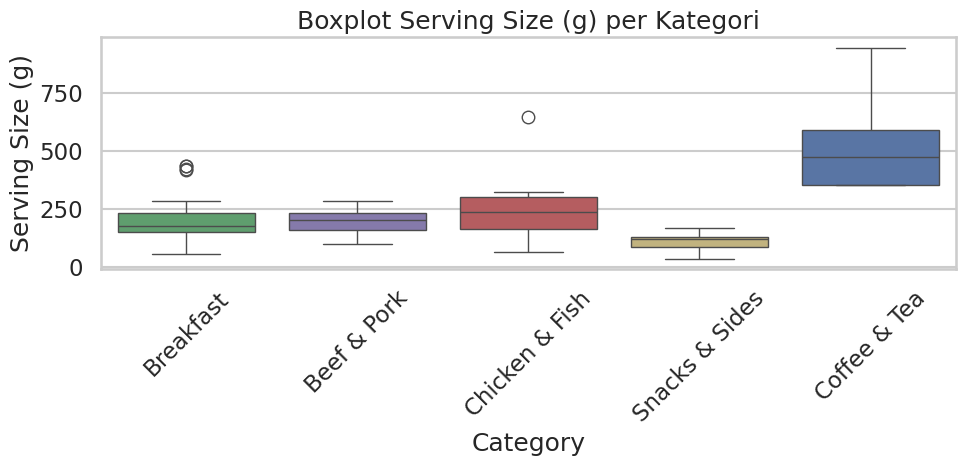

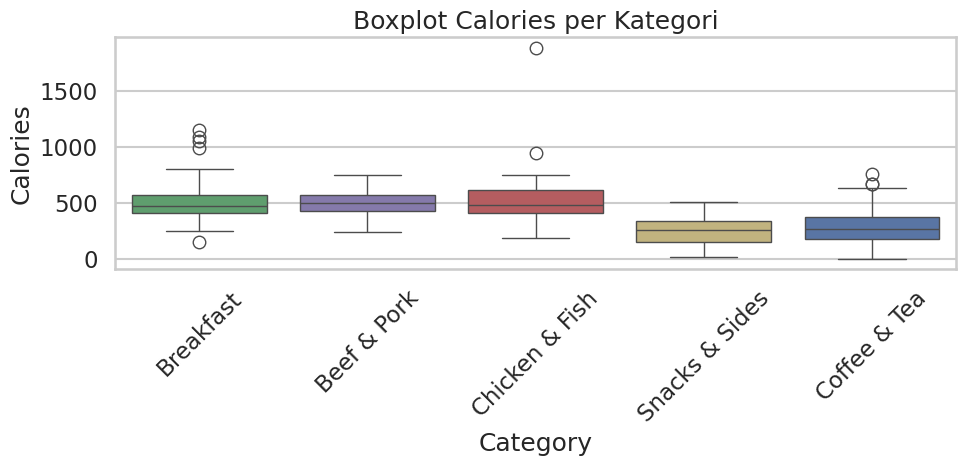

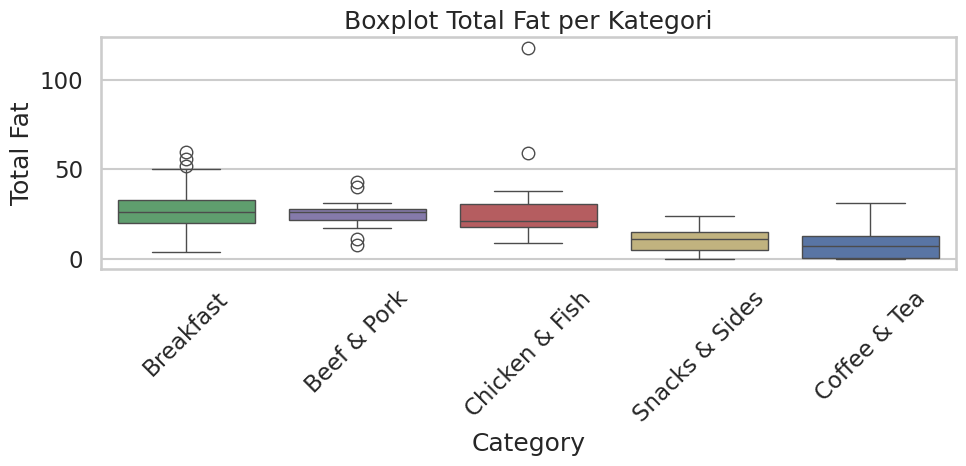

In [75]:
# Boxplot
for kolom in fitur:
    plt.figure(figsize=(10,5))

    sns.boxplot(
        x='Category',
        y=kolom,
        data=df_kategori,
        palette=palette_kategori
    )
    plt.title(f'Boxplot {kolom} per Kategori')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

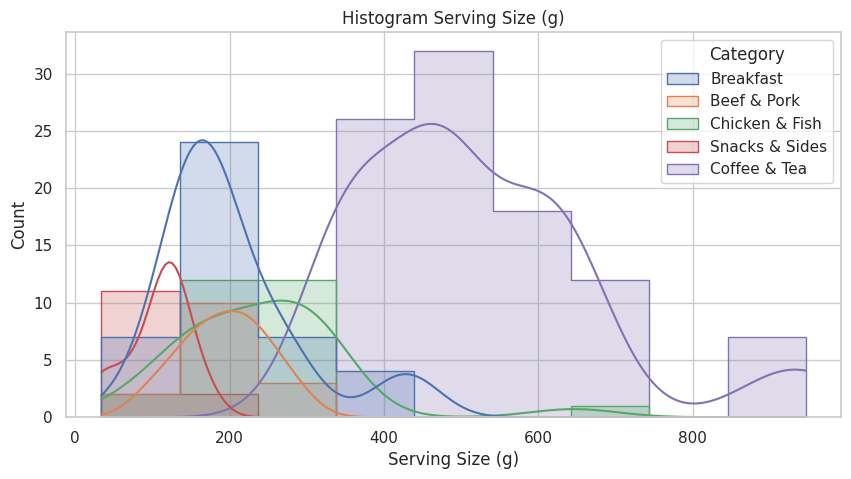

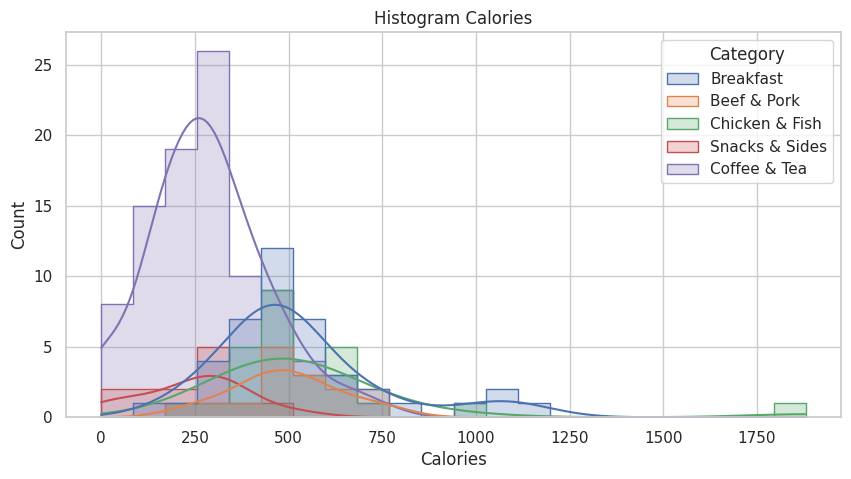

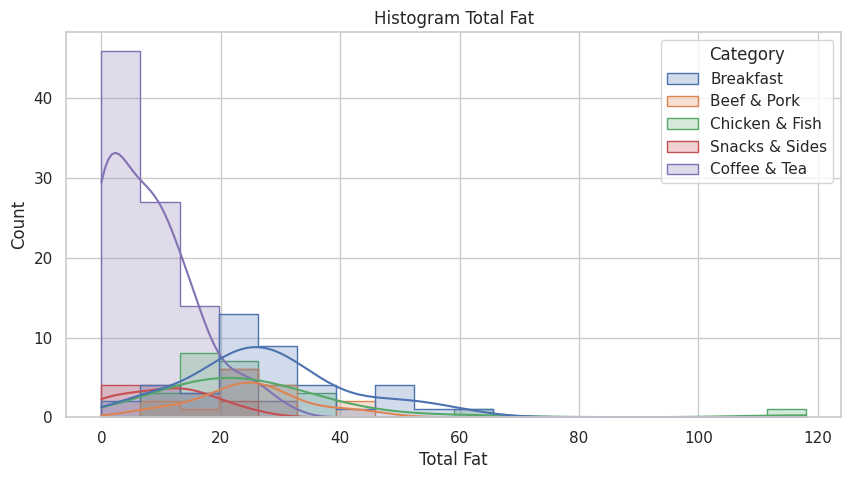

In [68]:
# Histogram
for kolom in fitur:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df_kategori, x=kolom, hue='Category', kde=True, element='step')
    plt.title(f'Histogram {kolom}')
    plt.show()

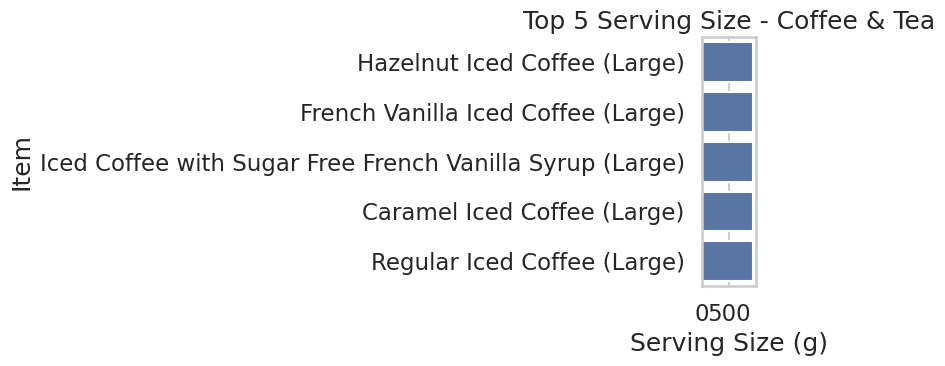

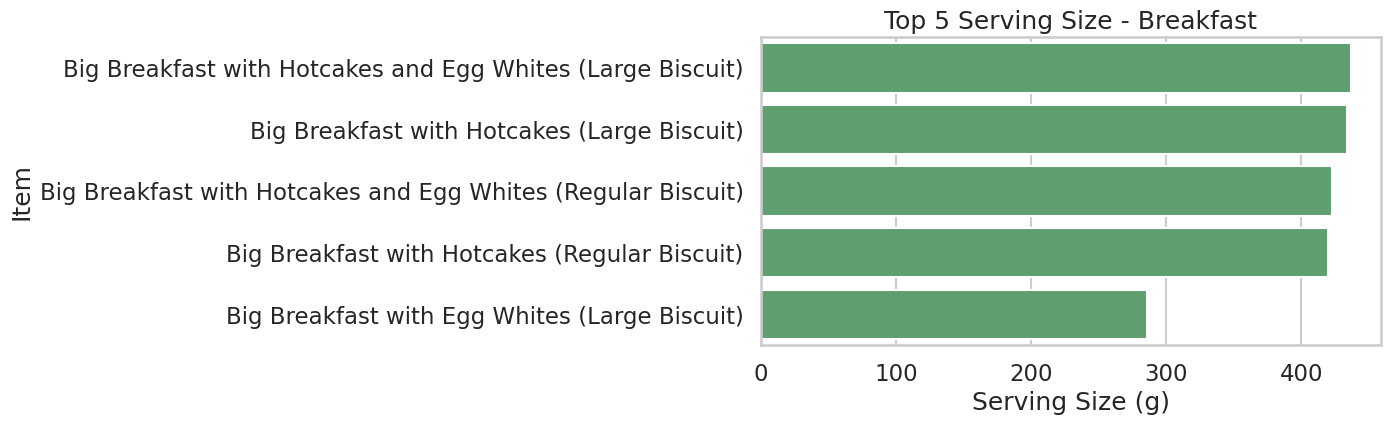

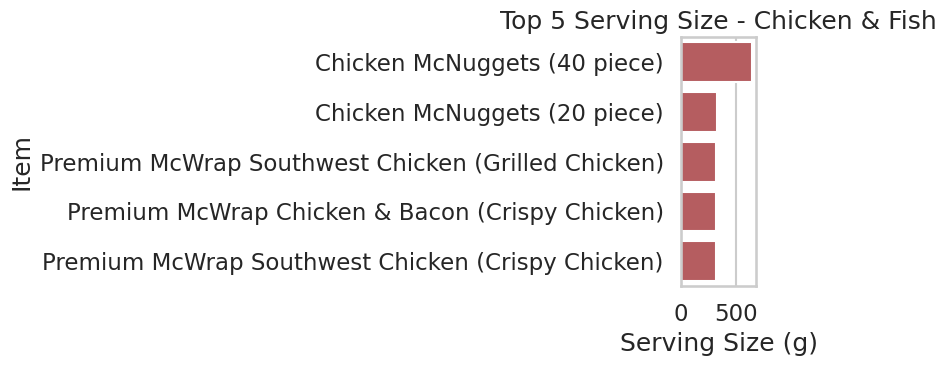

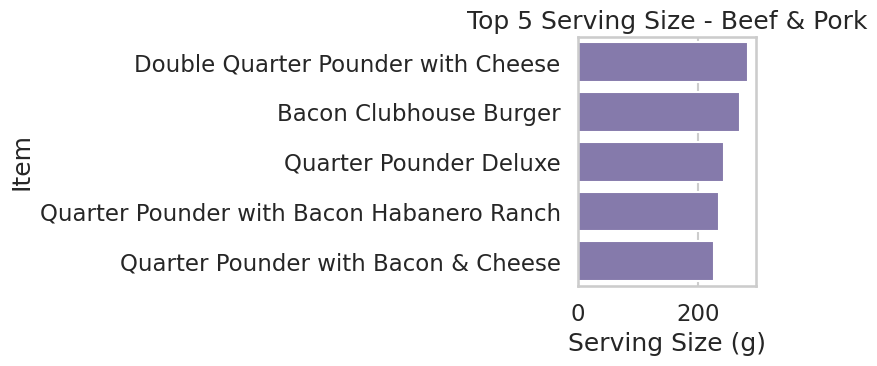

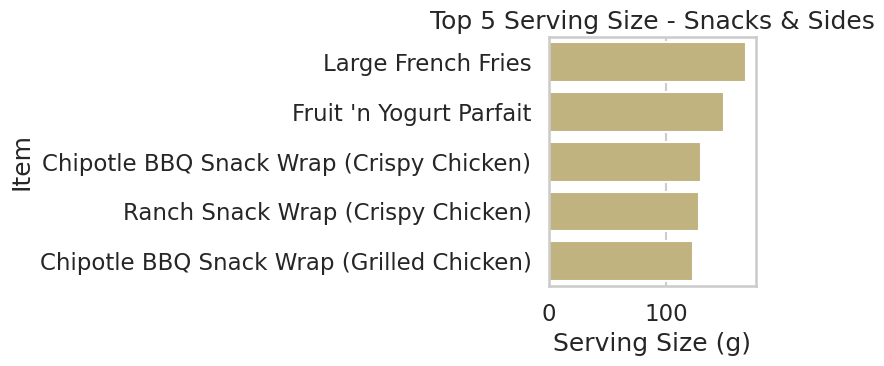

In [83]:
# 5 Menu dengan Serving Size Tertinggi
for cat in kategori:
    data_top = df[df['Category'] == cat].sort_values(
        by='Serving Size (g)', ascending=False).head(5)
    plt.figure(figsize=(8,4))

    sns.barplot(
        x='Serving Size (g)',
        y='Item',
        data=data_top,
        color=palette_kategori[cat]
    )
    plt.title(f'Top 5 Serving Size - {cat}')
    plt.tight_layout()
    plt.show()

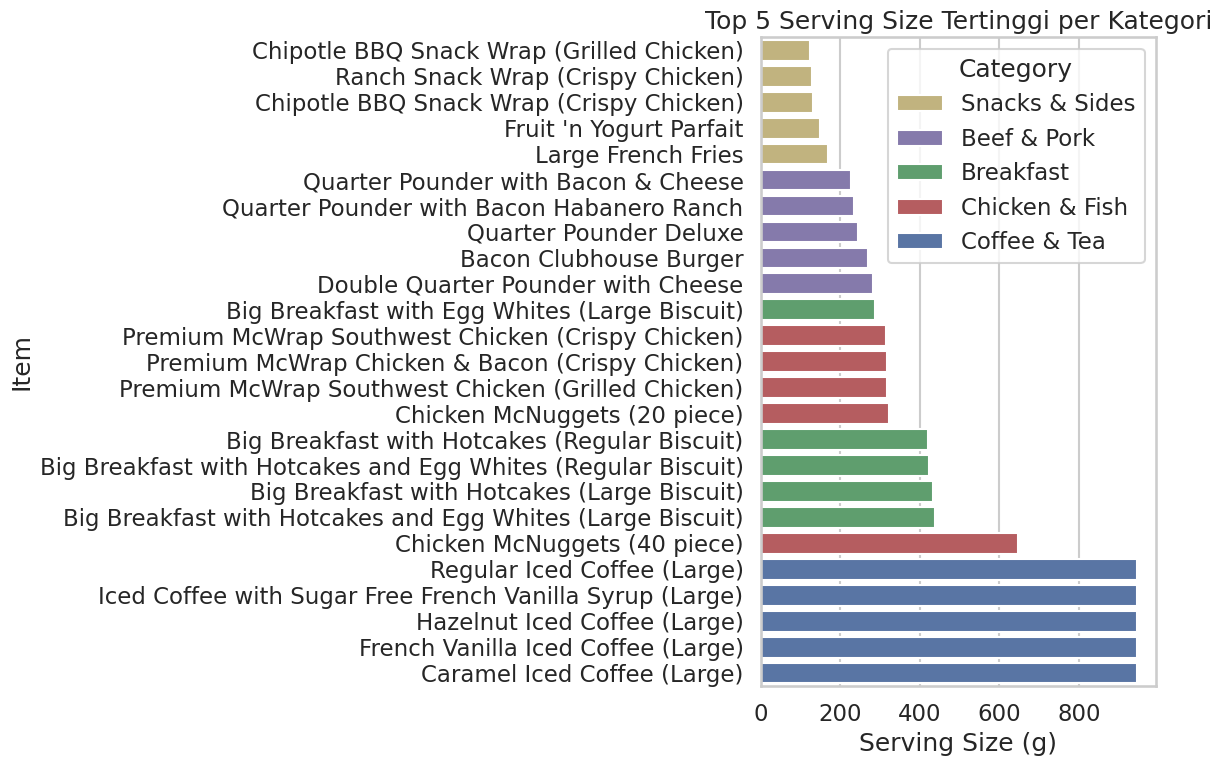

In [88]:
# Top 5 Serving Size per kategori
top5_serving = (
    df[df['Category'].isin(kategori)]
    .sort_values(['Category', 'Serving Size (g)'], ascending=[True, False])
    .groupby('Category')
    .head(5)
)
top5_serving = top5_serving.sort_values('Serving Size (g)', ascending=True)

# Plot dalam satu grafik
plt.figure(figsize=(12,8))

sns.barplot(
    data=top5_serving,
    x='Serving Size (g)',
    y='Item',
    hue='Category',
    palette=palette_kategori
)

plt.title('Top 5 Serving Size Tertinggi per Kategori')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

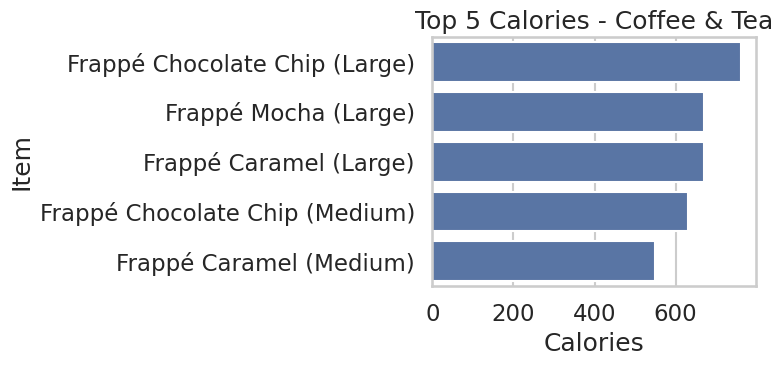

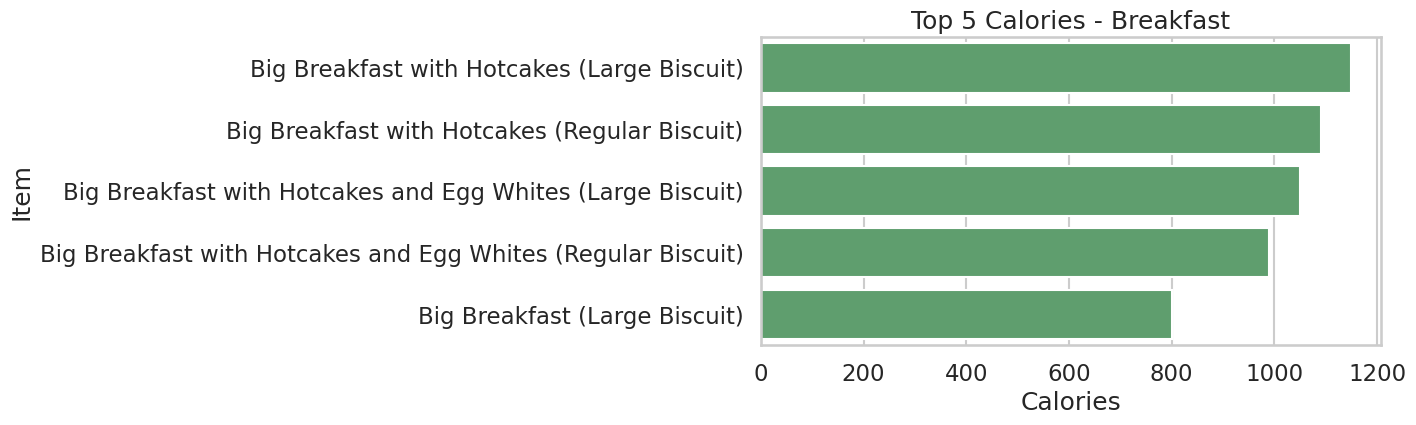

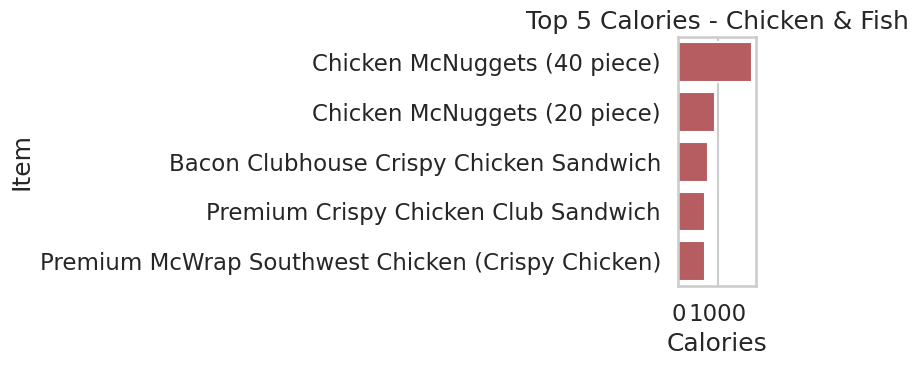

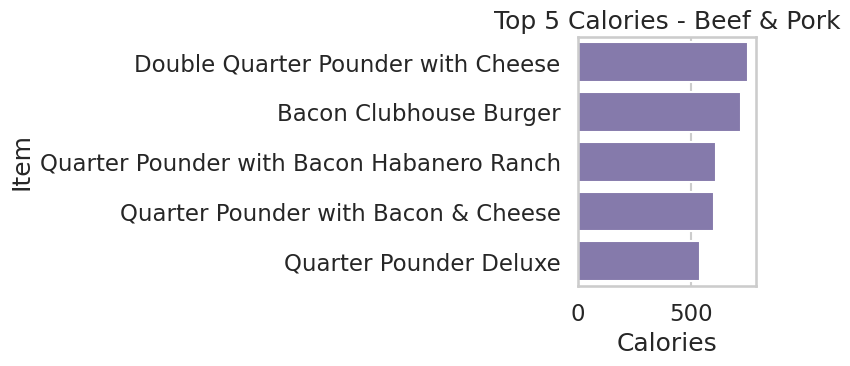

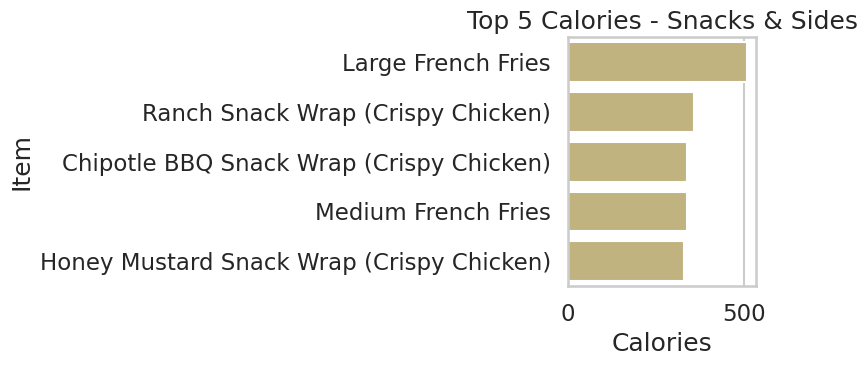

In [86]:
# 5 Menu dengan Calories Tertinggi
for cat in kategori:
    data_top = df[df['Category'] == cat].sort_values(
        by='Calories', ascending=False).head(5)

    plt.figure(figsize=(8,4))

    sns.barplot(
        x='Calories',
        y='Item',
        data=data_top,
        color=palette_kategori[cat]
    )

    plt.title(f'Top 5 Calories - {cat}')
    plt.tight_layout()
    plt.show()

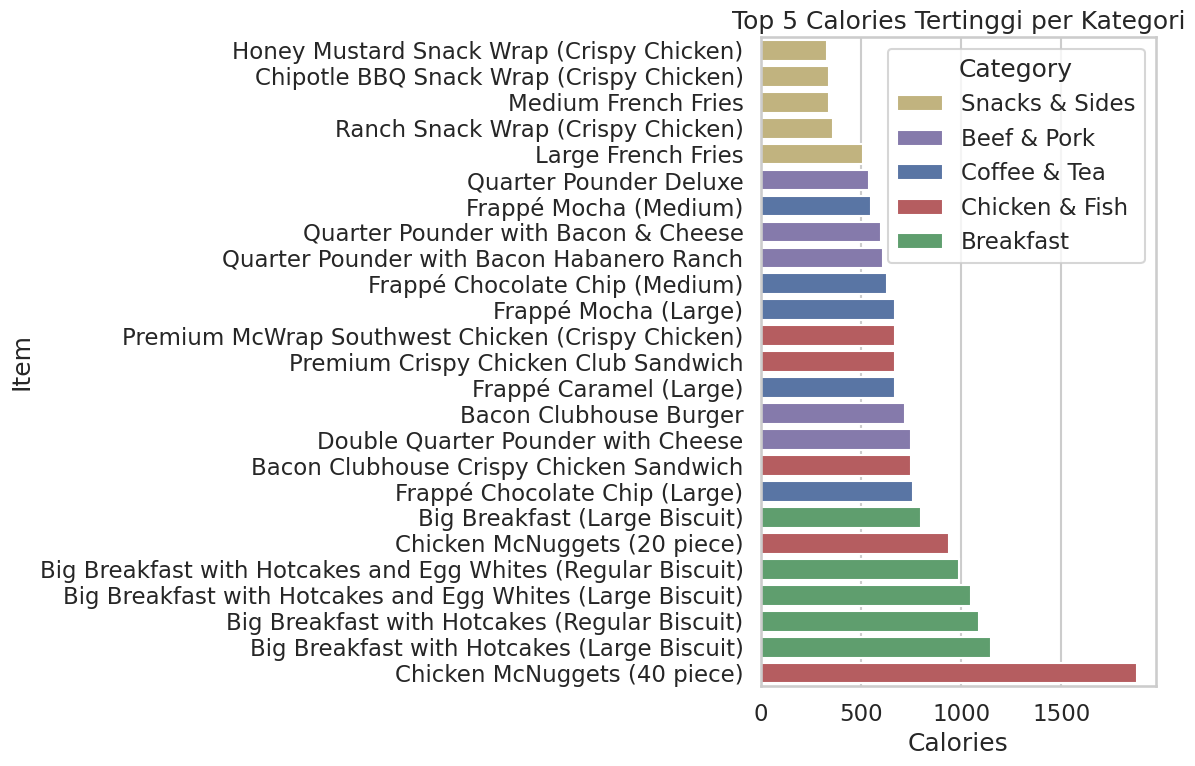

In [87]:
# Top 5 Calories per kategori
top5_calories = (
    df[df['Category'].isin(kategori)]
    .sort_values(['Category', 'Calories'], ascending=[True, False])
    .groupby('Category')
    .head(5)
)
top5_calories = top5_calories.sort_values('Calories', ascending=True)

# Plot dalam satu grafik
plt.figure(figsize=(12,8))

sns.barplot(
    data=top5_calories,
    x='Calories',
    y='Item',
    hue='Category',
    palette=palette_kategori
)

plt.title('Top 5 Calories Tertinggi per Kategori')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

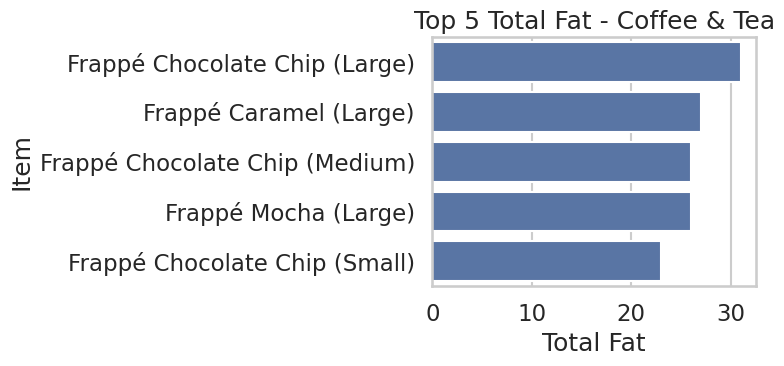

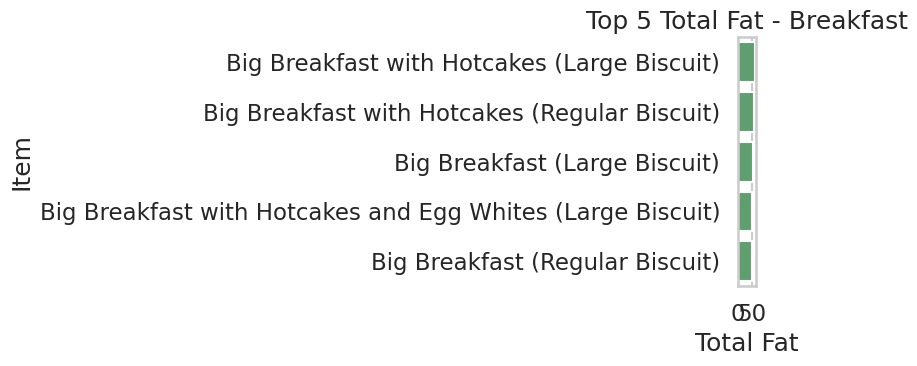

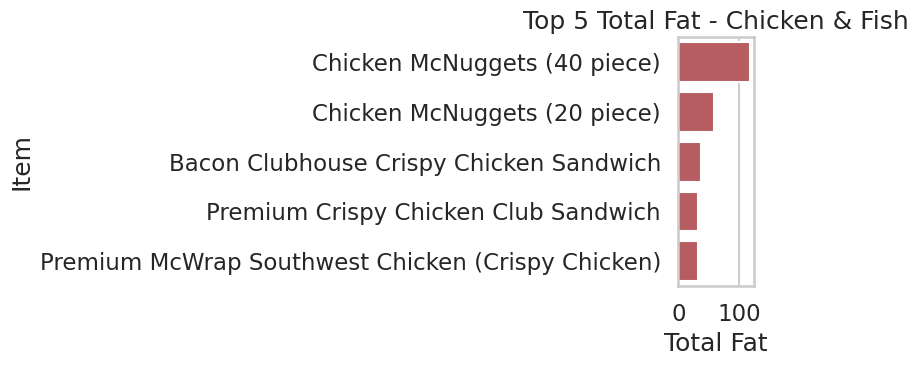

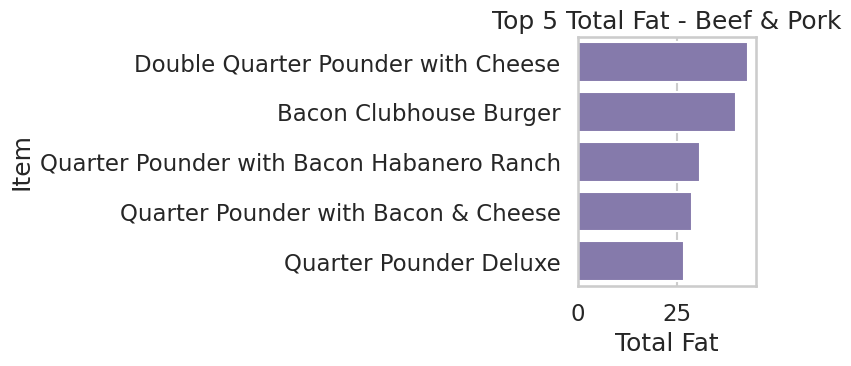

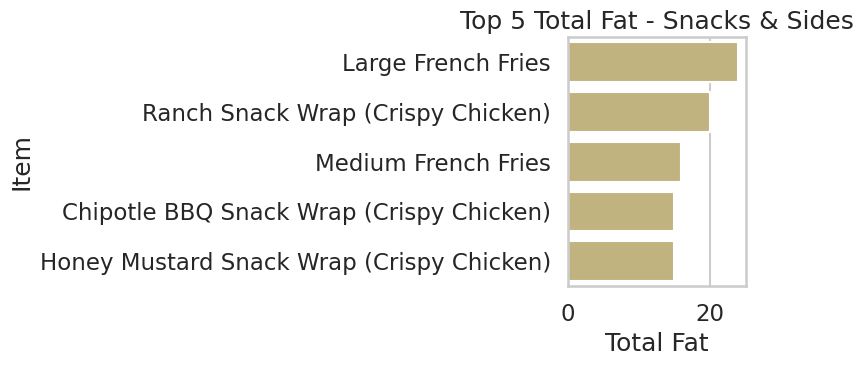

In [89]:
# 5 Menu dengan Total Fat Tertinggi
for cat in kategori:
    data_top = df[df['Category'] == cat].sort_values(
        by='Total Fat', ascending=False).head(5)

    plt.figure(figsize=(8,4))

    sns.barplot(
        x='Total Fat',
        y='Item',
        data=data_top,
        color=palette_kategori[cat]
    )

    plt.title(f'Top 5 Total Fat - {cat}')
    plt.tight_layout()
    plt.show()

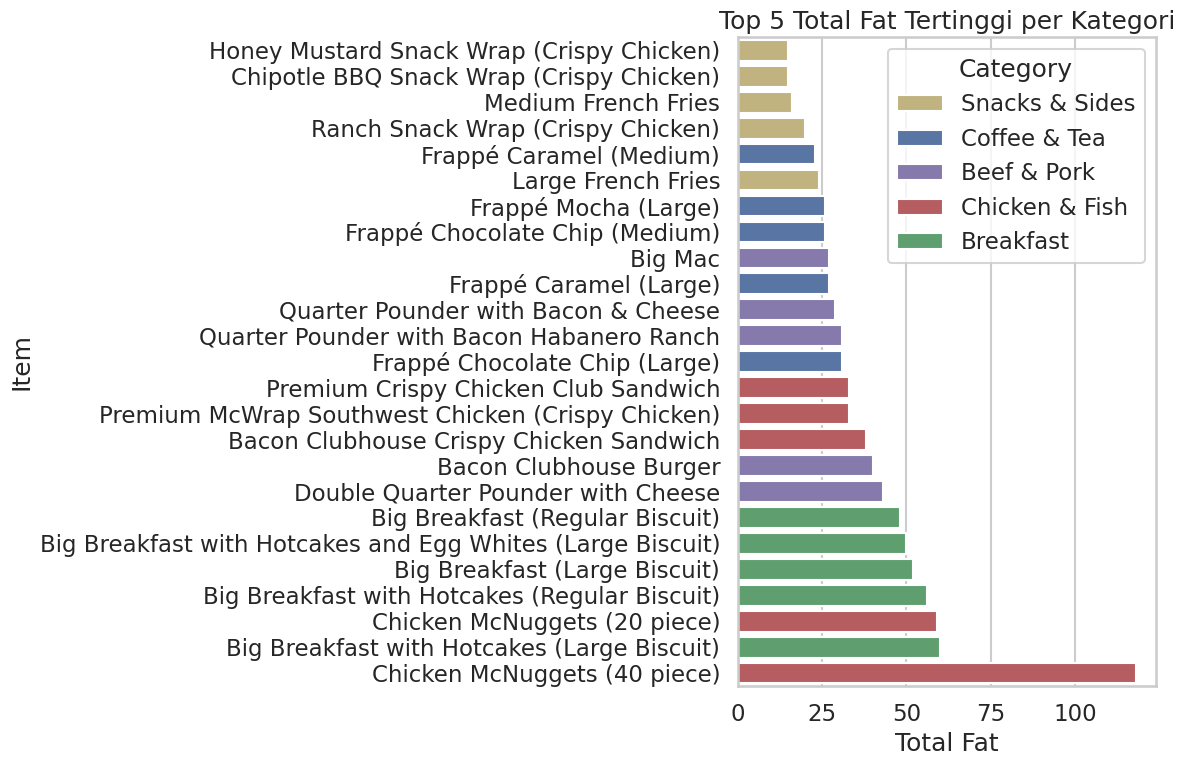

In [90]:
# Top 5 Total Fat per kategori
top5_fat = (
    df[df['Category'].isin(kategori)]
    .sort_values(['Category', 'Total Fat'], ascending=[True, False])
    .groupby('Category')
    .head(5)
)
top5_fat = top5_fat.sort_values('Total Fat', ascending=True)

# Plot dalam satu grafik
plt.figure(figsize=(12,8))

sns.barplot(
    data=top5_fat,
    x='Total Fat',
    y='Item',
    hue='Category',
    palette=palette_kategori
)

plt.title('Top 5 Total Fat Tertinggi per Kategori')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# 5. Insight & Conclusion

### Insight:

1. **Ukuran Porsi (Serving Size)**

   * Rata-rata menu sekitar 376 g dengan variasi cukup besar.
   * Outlier muncul pada minuman ukuran Large di kategori *Beverages* dan *Coffee & Tea*.

2. **Kalori (Calories)**

   * Rata-rata kalori 368 kal, mayoritas menu di bawah 400 kalori.
   * Outlier tinggi berasal dari*menu Breakfast paket besar dan Chicken McNuggets ukuran besar.

3. **Lemak Total (Total Fat)**

   * Rata-rata 14 g, sebagian besar menu relatif sedang.
   * Outlier ditemukan pada menu Breakfast paket besar dan McNuggets yang menandakan beberapa menu sangat tinggi lemak.

4. **Distribusi dan Variasi**

   * Variabel cenderung *right-skewed* karena adanya nilai ekstrem.
   * Calories memiliki variasi paling tinggi dibanding Serving Size dan Total Fat.
   * Mayoritas menu memiliki kandungan nutrisi moderat, tetapi beberapa menu “ekstrem” dapat memengaruhi rata-rata.

5. **Top 5 Menu per Kategori**

   * Visualisasi bar chart menunjukkan menu dengan **Serving Size, Calories, dan Total Fat tertinggi** berbeda per kategori.
   * Hal ini menunjukkan adanya variasi signifikan antar kategori menu McDonald’s.

### Kesimpulan:

* Mayoritas menu McDonald’s memiliki ukuran porsi, kalori, dan lemak sedang.
* Menu ekstrem (paket besar, minuman Large, McNuggets) berperan sebagai outlier dan memengaruhi statistik deskriptif.
* Variasi nutrisi antar kategori cukup signifikan sehingga analisis kategori penting untuk memahami pola konsumsi.
* Dataset siap digunakan untuk analisis lebih lanjut, termasuk visualisasi dan rekomendasi nutrisi.